# Problem Statement

we are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

Content:
    
ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: social security number of a person and it is a nine-digit identification number that is issued by the Social Security Administration (SSA) to U.S. citizens, permanent residents, and some temporary residents.

here first three digits of the SSN are known as the "Area Number," which reflects the geographical region in which the SSN was issued.
The next two digits, known as the "Group Number," reflect the order in which SSNs were issued within a particular area.
The last four digits are known as the "Serial Number" and are assigned sequentially.
Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person
Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries
Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments (in USD)

Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour: Represents the payment behavior of the customer (in USD)

Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

Credit_Score: Represents the bracket of credit score (Poor, Standard, Good) - Target column

# Kaggle Link

# https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the Data

In [2]:
train_df = pd.read_csv("train.csv",low_memory=False)
test_df = pd.read_csv("test.csv",low_memory=False)

# Exploring the data

In [3]:
train_df.shape

(100000, 28)

In [4]:
test_df.shape

(50000, 27)

In [5]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [6]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [10]:
train_df.describe(exclude=np.number)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,3635,4,13178,404,3,91049,7,98790,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [11]:
train_df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [12]:
train_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [13]:
empty_space_df = train_df.isna().sum()
empty_space_df_percentage = (empty_space_df/ (empty_space_df.sum()))*100

#to remove columns withour missing value
empty_space_df_percentage = empty_space_df_percentage.drop(empty_space_df_percentage[empty_space_df_percentage ==0].index)

empty_space_df_percentage = empty_space_df_percentage.sort_values(ascending=False)

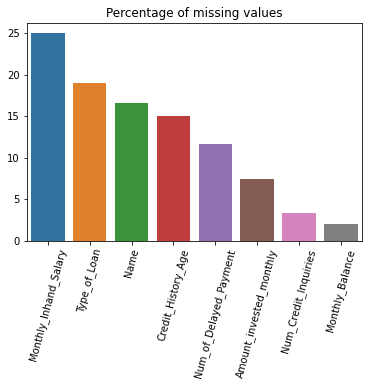

In [14]:
plt.xticks(rotation = '75')
sns.barplot(x = empty_space_df_percentage.index, y = empty_space_df_percentage)
plt.title('Percentage of missing values');

In [15]:
# Check unique for missing value or incorrect data
for i in train_df:
  print('\n',"************",i,"**************",'\n',train_df[i].unique())


 ************ ID ************** 
 ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

 ************ Customer_ID ************** 
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 ************ Month ************** 
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

 ************ Name ************** 
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 ************ Age ************** 
 ['23' '-500' '28_' ... '4808_' '2263' '1342']

 ************ SSN ************** 
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

 ************ Occupation ************** 
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 ************ Annual_Income ************** 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' 

In [16]:
#Separating numerical and categorical columns
num_cols = train_df.select_dtypes(include=np.number)
cat_cols = train_df.select_dtypes(include='object')

In [17]:
num_cols.columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [18]:
cat_cols.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# Data Preprocessing

In [19]:
train_df = train_df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

# Remove Unnecessary columns

In [20]:
train = train_df.drop(["ID",'SSN','Name'], axis=1)

In [21]:
train.shape

(100000, 25)

# Edit columns and Datatype

In [22]:
train['Customer_ID'] = train.Customer_ID.apply(lambda x: int(x[4:], 16))

In [23]:
train['Age'] = train.Age.astype(int)

In [24]:
train['Annual_Income'] = train.Annual_Income.astype(float)

In [25]:
train['Num_of_Loan'] = train.Num_of_Loan.astype(int)

In [26]:
train['Num_of_Delayed_Payment'] = train.Num_of_Delayed_Payment.astype(float)

In [27]:
train['Changed_Credit_Limit'] = train.Changed_Credit_Limit.astype(float)

In [28]:
train['Outstanding_Debt'] = train.Outstanding_Debt.astype(float)

In [29]:
train['Amount_invested_monthly'] = train.Amount_invested_monthly.astype(float)

In [30]:
train['Monthly_Balance'] = train.Monthly_Balance.astype(float)

In [31]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return num1*12+num2
    else:
        return x

In [32]:
train['Credit_History_Age'] = train.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [33]:
num_cols1 = train.select_dtypes(include=np.number)
cat_cols1 = train.select_dtypes(include='object')

In [34]:
num_cols1

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,3392,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,3392,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629163
2,3392,-500,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,3392,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,3392,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,25,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,60.971333,479.866228
99996,37932,25,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,54.185950,496.651610
99997,37932,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083
99998,37932,25,39628.99,3359.415833,4,6,7,2,20,NaN,11.50,3.0,502.38,33.638208,381.0,35.104023,251.672582,319.164979


In [35]:
cat_cols1

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...
99995,April,Mechanic,"Auto Loan, and Student Loan",NaN,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,"Auto Loan, and Student Loan",NaN,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


# Checking Missing Values in columns

In [36]:
def missing_value_columns (data):
    miss_cols = (data.isnull().sum())
    return miss_cols[miss_cols>0]

missing_value_columns(train)

Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

In [37]:
miss_cols = (train.isnull().sum())
(miss_cols[miss_cols>0]).index

Index(['Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

# Otliers Detection & Filling null values

In [38]:
miss_num_cols = list(train[(miss_cols[miss_cols>0]).index].select_dtypes(include=['int64','float64']).columns)
miss_num_cols

['Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

# Boxplot

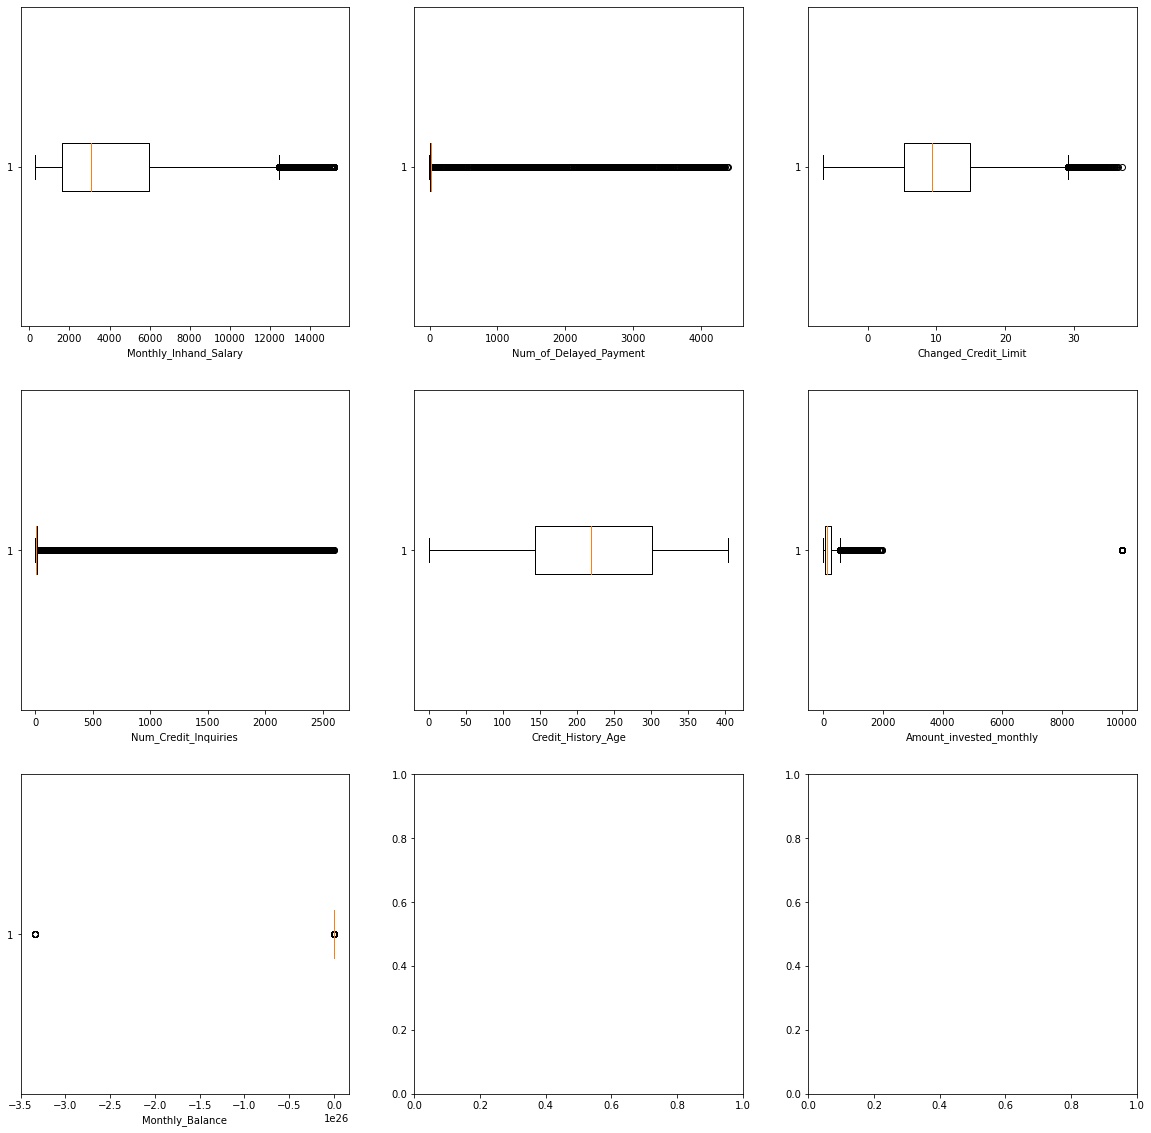

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i, column in enumerate(miss_num_cols):
    row = i // 3
    col = i % 3
    if row < 5:
        ax = axes[row][col]
        ax.boxplot(train[column].dropna(), vert=False)
        ax.set_xlabel(column)
plt.show()

# Removing Null values from numerical columns

# Monthly_Inhand_Salary

In [40]:
def get_Monthly_Inhand_Salary(row):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        Monthly_Inhand_Salary=(train[train['Customer_ID']==row['Customer_ID']]['Monthly_Inhand_Salary'].dropna()).mode()
        try:
            return Monthly_Inhand_Salary[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Inhand_Salary']

In [41]:
train['Monthly_Inhand_Salary']=train.apply(get_Monthly_Inhand_Salary,axis=1)

In [42]:
#Detect Outliers
print(train[train['Monthly_Inhand_Salary']>= 12900].shape)
train=train[train.Monthly_Inhand_Salary < 125900]

(1718, 25)


In [43]:
train.shape

(100000, 25)

# Num_of_Delayed_Payment

In [44]:
def get_Num_of_Delayed_Payment(row):
    if pd.isnull(row['Num_of_Delayed_Payment']):
        Num_of_Delayed_Payment=(train[train['Customer_ID']==row['Customer_ID']]['Num_of_Delayed_Payment'].dropna()).mode()
        try:
            return Num_of_Delayed_Payment[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Delayed_Payment']

In [45]:
train['Num_of_Delayed_Payment']=train.apply(get_Num_of_Delayed_Payment,axis=1)

In [46]:
print(train[train['Num_of_Delayed_Payment']>=50].shape)
print(train[train['Num_of_Delayed_Payment'] < 0].shape)
train=train[train['Num_of_Delayed_Payment']< 50]
train=train[train['Num_of_Delayed_Payment'] >= 0]

(733, 25)
(654, 25)


In [47]:
train.shape

(98613, 25)

# Changed_Credit_Limit

In [48]:
def get_Changed_Credit_Limit(row):
    if pd.isnull(row['Changed_Credit_Limit']):
        Changed_Credit_Limit=(train[train['Customer_ID']==row['Customer_ID']]['Changed_Credit_Limit'].dropna()).mode()
        try:
            return Changed_Credit_Limit[0]
        except:
            return np.NaN
    else:
        return row['Changed_Credit_Limit']

In [49]:
train['Changed_Credit_Limit']=train.apply(get_Changed_Credit_Limit,axis=1)

In [50]:
print(train[train['Changed_Credit_Limit']>=30].shape)
train=train[train['Changed_Credit_Limit'] < 30]

(254, 25)


In [51]:
train.shape

(98359, 25)

# Num_Credit_Inquiries

In [52]:
def get_Num_Credit_Inquiries(row):
    if pd.isnull(row['Num_Credit_Inquiries']):
        Num_Credit_Inquiries=(train[train['Customer_ID']==row['Customer_ID']]['Num_Credit_Inquiries'].dropna()).mode()
        try:
            return Num_Credit_Inquiries[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Inquiries']

In [53]:
train['Num_Credit_Inquiries']=train.apply(get_Num_Credit_Inquiries,axis=1)

In [54]:
print(train[train['Num_Credit_Inquiries']>=25].shape)
train=train[train['Num_Credit_Inquiries']<25]

(1624, 25)


In [55]:
train.shape

(96735, 25)

# Credit_History_Age

In [56]:
def get_Credit_History_Age(row):
    if pd.isnull(row['Credit_History_Age']):
        Credit_History_Age=(train[train['Customer_ID']==row['Customer_ID']]['Credit_History_Age'].dropna()).mode()
        try:
            return Credit_History_Age[0]
        except:
            return np.NaN
    else:
        return row['Credit_History_Age']

In [57]:
train['Credit_History_Age']=train.apply(get_Credit_History_Age,axis=1)

# Amount_invested_monthly

In [58]:
def get_Amount_invested_monthly(row):
    if pd.isnull(row['Amount_invested_monthly']):
        Amount_invested_monthly=(train[train['Customer_ID']==row['Customer_ID']]['Amount_invested_monthly'].dropna()).mode()
        try:
            return Amount_invested_monthly[0]
        except:
            return np.NaN
    else:
        return row['Amount_invested_monthly']

In [59]:
train['Amount_invested_monthly']=train.apply(get_Amount_invested_monthly,axis=1)

In [60]:
print(train[train['Amount_invested_monthly']>=500].shape)
train=train[train['Amount_invested_monthly']<500]

(11189, 25)


In [61]:
train.shape

(85546, 25)

# Monthly_Balance

In [62]:
def get_Monthly_Balance(row):
    if pd.isnull(row['Monthly_Balance']):
        Monthly_Balance=(train[train['Customer_ID']==row['Customer_ID']]['Monthly_Balance'].dropna()).mode()
        try:
            return Monthly_Balance[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Balance']

In [63]:
train['Monthly_Balance']=train.apply(get_Monthly_Balance,axis=1)

In [64]:
print(train[train['Monthly_Balance'] <= 0].shape)
print(train[train['Amount_invested_monthly']>=800].shape)
train = train[train['Monthly_Balance'] > 0]
train = train[train['Monthly_Balance'] <= 800]

(8, 25)
(0, 25)


In [65]:
train.shape

(79640, 25)

In [66]:
missing_columns=train.isnull().sum()
miss_num_columns = list(train[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

[]

# Outliers Checking

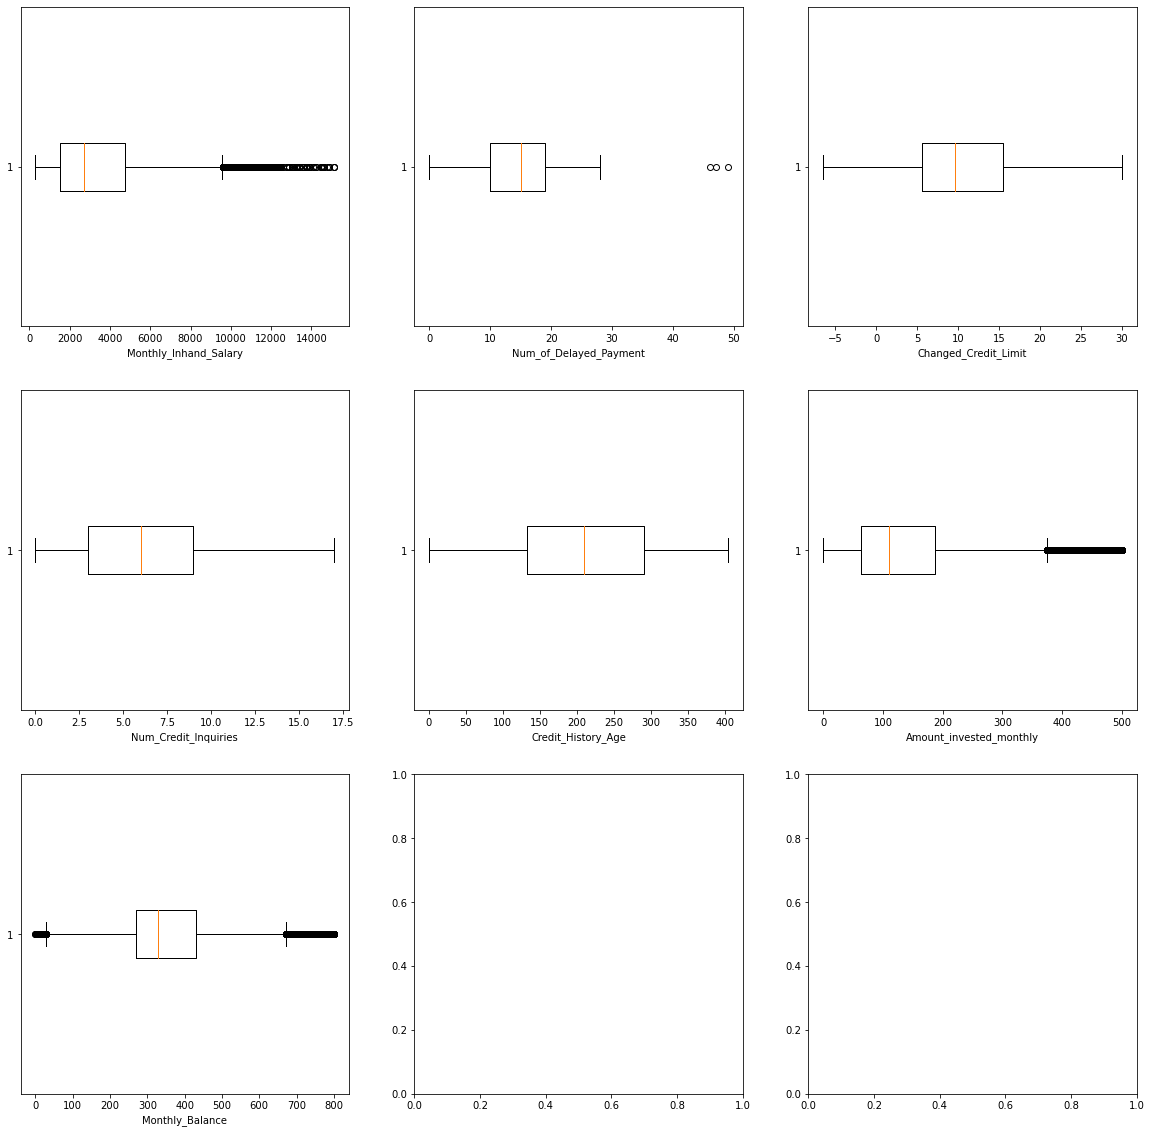

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i, column in enumerate(miss_num_cols):
    row = i // 3
    col = i % 3
    if row < 5:
        ax = axes[row][col]
        ax.boxplot(train[column].dropna(), vert=False)
        ax.set_xlabel(column)
plt.show()

In [68]:
missing_columns=train.isnull().sum()
miss_cat_columns = list(train[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["object","category"]).columns)
miss_cat_columns

['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

# Filling null values in Categorical columns

In [69]:
missing_value_columns(train)

Occupation            5636
Type_of_Loan          7552
Credit_Mix           16161
Payment_Behaviour     6081
dtype: int64

# Occupation

In [70]:
def get_Occupation(row):
    if pd.isnull(row['Occupation']):
        Occupation=(train[train['Customer_ID']==row['Customer_ID']]['Occupation'].dropna()).mode()
        try:
            return Occupation[0]
        except:
            return np.NaN
    else:
        return row['Occupation']

In [71]:
train['Occupation']=train.apply(get_Occupation,axis=1)

In [72]:
train['Occupation'] = train['Occupation'].fillna(train['Occupation'].mode()[0])

In [73]:
len(train[train['Occupation'].isnull()])

0

In [74]:
train1 = train.drop('Type_of_Loan', axis=1)

In [75]:
train1.shape

(79640, 24)

# Credit_Mix

In [76]:
def get_Credit_Mix(row):
    if pd.isnull(row['Credit_Mix']):
        Credit_Mix=(train1[train1['Customer_ID']==row['Customer_ID']]['Credit_Mix'].dropna()).mode()
        try:
            return Credit_Mix[0]
        except:
            return np.NaN
    else:
        return row['Credit_Mix']

In [77]:
train1['Credit_Mix']=train1.apply(get_Credit_Mix,axis=1)

In [78]:
train1['Credit_Mix'] = train1['Credit_Mix'].fillna(train1['Credit_Mix'].mode()[0])

In [79]:
len(train1[train1['Credit_Mix'].isnull()])

0

# Payment_Behaviour

In [80]:
def get_Payment_Behaviour(row):
    if pd.isnull(row['Payment_Behaviour']):
        Payment_Behaviour=(train1[train1['Customer_ID']==row['Customer_ID']]['Payment_Behaviour'].dropna()).mode()
        try:
            return Payment_Behaviour[0]
        except:
            return np.NaN
    else:
        return row['Payment_Behaviour']

In [81]:
train1['Payment_Behaviour']=train1.apply(get_Payment_Behaviour,axis=1)

In [82]:
train1['Payment_Behaviour'] = train1['Payment_Behaviour'].fillna(train1['Payment_Behaviour'].mode()[0])

In [83]:
len(train1[train1['Payment_Behaviour'].isnull()])

0

# Removing outliers by  Manual Estimation

In [84]:
(num_cols1).index

RangeIndex(start=0, stop=100000, step=1)

In [85]:
#train1.reset_index(drop=True, inplace=True)

train1.drop(train1[train1.Age < 10].index, inplace=True)
train1.drop(train1[train1.Age > 99].index, inplace=True)

In [86]:
#to limit the number of bank account till 15
train1.drop(train1[train1.Num_Bank_Accounts>15].index, inplace = True)

#to remove the entries having number of credit card more than 15 
train1.drop(train1[train1.Num_Credit_Card > 15].index, inplace = True)

#to drop the entries having unrealistic Annual Income, which is greater 1000000.00
train1.drop(train1[train1.Annual_Income > 1000000.00].index, inplace = True)

#to drop the negative number of loan
train1.drop(train1[train1.Num_of_Loan < 0].index, inplace = True)

#to drop the entries having number of loan greater than 20
train1.drop(train1[train1.Num_of_Loan > 20].index, inplace = True)

#to drop the enties having intrest rate greater than 1000.0
train1.drop(train1[train1.Interest_Rate >1000.0].index, inplace = True)

#to drop the negative values of delay from due date
train1.drop(train1[train1.Delay_from_due_date < 0].index, inplace = True)

#to drop the entires having total EMI per month greater than 10000
train1.drop(train1[train1.Total_EMI_per_month > 10000.00].index, inplace = True)

#to drop entries having number of credit inquiry greater than 10
train1.drop(train1[train1.Num_Credit_Inquiries >10].index, inplace = True)

# Encoding categorical features

In [87]:
train1['Month'].unique()

array(['January', 'April', 'May', 'June', 'July', 'August', 'February',
       'March'], dtype=object)

In [88]:
Months = ['January', 'April', 'May', 'June', 'July', 'August', 'February', 'March']

In [89]:
# Define a dictionary to map each category to a numerical label
label_map = {}
label = 0
for i in Months:
    label_map[i] = label
    label += 1

# Map the Month column to its encoded labels
train1['Month_Encoded'] = train1['Month'].apply(lambda x: label_map[x])

In [90]:
train1.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_Encoded
0,3392,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,0
3,3392,April,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1
4,3392,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,2
5,3392,June,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,27.262259,270.0,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good,3
6,3392,July,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,22.537593,271.0,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,4


In [91]:
train1['Occupation'].unique()

array(['Scientist', 'Teacher', 'Entrepreneur', 'Developer', 'Lawyer',
       'Media_Manager', 'Doctor', 'Journalist', 'Engineer', 'Manager',
       'Accountant', 'Musician', 'Writer', 'Architect', 'Mechanic'],
      dtype=object)

In [92]:
Occupations = ['Scientist', 'Teacher', 'Entrepreneur', 'Developer', 'Lawyer',
       'Media_Manager', 'Doctor', 'Journalist', 'Engineer', 'Manager',
       'Accountant', 'Musician', 'Writer', 'Architect', 'Mechanic']

In [93]:
label_map = {}
label = 0
for i in Occupations:
    label_map[i] = label
    label += 1

train1['Occupation_Encoded'] = train1['Occupation'].apply(lambda x: label_map[x])

In [94]:
train1.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_Encoded,Occupation_Encoded
0,3392,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,0,0
3,3392,April,23,Scientist,19114.12,1824.843333,3,4,3,4,...,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1,0
4,3392,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,2,0
5,3392,June,23,Scientist,19114.12,1824.843333,3,4,3,4,...,27.262259,270.0,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good,3,0
6,3392,July,23,Scientist,19114.12,1824.843333,3,4,3,4,...,22.537593,271.0,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,4,0


In [95]:
train1['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [96]:
Credit_Mixs = ['Good', 'Standard', 'Bad']

In [97]:
label_map = {}
label = 0
for i in Credit_Mixs:
    label_map[i] = label
    label += 1

train1['Credit_Mix_Encoded'] = train1['Credit_Mix'].apply(lambda x: label_map[x])

In [98]:
train1['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [99]:
Payment_Behaviours = ['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments']

In [100]:
label_map = {}
label = 0
for i in Payment_Behaviours:
    label_map[i] = label
    label += 1

train1['Payment_Behaviour_Encoded'] = train1['Payment_Behaviour'].apply(lambda x: label_map[x])

In [101]:
train1['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [102]:
Payment_of_Min_Amounts = ['No', 'NM', 'Yes']

In [103]:
label_map = {}
label = 0
for i in Payment_of_Min_Amounts:
    label_map[i] = label
    label += 1

train1['Payment_of_Min_Amount_Encoded'] = train1['Payment_of_Min_Amount'].apply(lambda x: label_map[x])

In [104]:
train1['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [105]:
Credit_Scores = ['Good', 'Standard', 'Poor']

In [106]:
label_map = {}
label = 0
for i in Credit_Scores:
    label_map[i] = label
    label += 1

train1['Credit_Score_Encoded'] = train1['Credit_Score'].apply(lambda x: label_map[x])

In [107]:
new_train = train1.drop(['Month','Occupation','Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount','Credit_Score'], axis=1)

In [108]:
new_train.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Encoded,Occupation_Encoded,Credit_Mix_Encoded,Payment_Behaviour_Encoded,Payment_of_Min_Amount_Encoded,Credit_Score_Encoded
0,3392,23,19114.12,1824.843333,3,4,3,4,3,7.0,...,265.0,49.574949,80.415295,312.494089,0,0,0,0,0,0
3,3392,23,19114.12,1824.843333,3,4,3,4,5,4.0,...,268.0,49.574949,199.458074,223.451310,1,0,0,1,0,0
4,3392,23,19114.12,1824.843333,3,4,3,4,6,4.0,...,269.0,49.574949,41.420153,341.489231,2,0,0,2,0,0
5,3392,23,19114.12,1824.843333,3,4,3,4,8,4.0,...,270.0,49.574949,62.430172,340.479212,3,0,0,2,0,0
6,3392,23,19114.12,1824.843333,3,4,3,4,3,8.0,...,271.0,49.574949,178.344067,244.565317,4,0,0,1,0,0


In [109]:
new_train.shape

(56332, 24)

# CART Model Building

In [110]:
# Define a function to calculate Gini impurity
def gini_impurity(labels):
    classes = np.unique(labels)
    impurity = 1
    for c in classes:
        p = np.sum(labels == c) / len(labels)
        impurity -= p ** 2
    return impurity

# Define a function to split the data based on a feature and threshold
def split_data(X, y, feature, threshold):
    left_indices = np.where(X[:, feature] <= threshold)[0]           
    right_indices = np.where(X[:, feature] > threshold)[0]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split for a given node
def find_best_split(X, y):
    best_feature, best_threshold, best_impurity = None, None, 1
    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_data(X, y, feature, threshold)
            impurity = (len(y_left) / len(y)) * gini_impurity(y_left) + (len(y_right) / len(y)) * gini_impurity(y_right)
            if impurity < best_impurity:
                best_feature, best_threshold, best_impurity = feature, threshold, impurity
    return best_feature, best_threshold

In [111]:
# Define a class for the decision tree
class Node:
    def __init__(self, X, y, depth, max_depth, min_samples_leaf):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None

    def split(self):    # Splits the input data and labels into two subsets based on the best feature and threshold 
        self.feature, self.threshold = find_best_split(self.X, self.y)
        X_left, y_left, X_right, y_right = split_data(self.X, self.y, self.feature, self.threshold)
        if len(y_left) > 0 and len(y_right) > 0 and self.depth < self.max_depth:
            self.left = Node(X_left, y_left, self.depth + 1, self.max_depth, min_samples_leaf)
            self.right = Node(X_right, y_right, self.depth + 1, self.max_depth, min_samples_leaf)

    def predict(self, x):#Given a new data point x, traverses the tree to predict the class label for x.
        if self.label is not None:
            return self.label
        if x[self.feature] <= self.threshold:
            return self.left.predict(x)
        else:
            return self.right.predict(x)
            

    def fit(self):
        if len(np.unique(self.y)) == 1: #If all the elements in the target variable y are the same .This node becomes a leaf node
            self.label = self.y[0]
            return
        if self.depth == self.max_depth:
            self.label = np.bincount(self.y).argmax()
            return
        if len(y) < self.min_samples_leaf:
            self.label = np.bincount(self.y).argmax()
            return
        self.split()
        if self.left is not None:
            self.left.fit()
        if self.right is not None:
            self.right.fit()


In [112]:
# Split the data into features and target
X = new_train.drop('Credit_Score_Encoded', axis=1).values # convert this DataFrame into a NumPy array
y = new_train['Credit_Score_Encoded'].values

In [113]:
def minmax_scaler(X):
    min_val = np.min(X)
    max_val = np.max(X)
    X = (X - min_val) / (max_val - min_val)
    return X

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Build the decision tree
min_samples_leaf = 5
tree = Node(X_train, y_train, 0, 10, min_samples_leaf)
tree.fit()

# Define a function to calculate the accuracy of the model
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predict the classes of the test data
y_pred = np.array([tree.predict(x) for x in X_test])

# Calculate the accuracy of the model
print('Accuracy:', accuracy(y_test, y_pred)) 

Accuracy: 0.7371971243454336


In [116]:
# Define a function to calculate recall for a multiclass problem with 3 classes
def recall(y_true, y_pred):
    classes = np.unique(y_true)
    recall_list = []
    for c in classes:
        tp = np.sum((y_true == c) & (y_pred == c))
        fn = np.sum((y_true == c) & (y_pred != c))
        recall = tp / (tp + fn)
        recall_list.append(recall)
    return recall_list

# Calculate the recall of the model
print('Recall:', recall(y_test, y_pred))

Recall: [0.6881507188894398, 0.7854352242537896, 0.663626797614872]


In [117]:
y_test.shape

(11267,)

In [118]:
y_pred.shape

(11267,)

In [119]:
print('Recall:', recall(y_test, y_pred))

Recall: [0.6881507188894398, 0.7854352242537896, 0.663626797614872]


# Test Data

In [120]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [121]:
test_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [122]:
test_df.describe(exclude=np.number)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,50000,50000,50000,44985,50000,50000,50000,50000,50000,44296,46502,50000,50000,50000,45530,50000,47729,50000,49438
unique,50000,12500,4,10139,976,12501,16,16121,263,6260,443,3927,4,12685,399,3,45450,7,49433
top,0x160a,CUS_0xd40,September,Stevex,39,#F%$D@*&8,_______,109945.32,2,Not Specified,19,_,Standard,1109.03,20 Years and 1 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,4,12500,22,1493,2828,3438,8,7173,704,2622,1059,18379,12,254,26158,2175,12694,6


In [123]:
test_df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [124]:
empty_space_df = test_df.isnull().sum()
empty_space_df_percentage = (empty_space_df/ (empty_space_df.sum()))*100

#to remove columns withour missing value
empty_space_df_percentage = empty_space_df_percentage.drop(empty_space_df_percentage[empty_space_df_percentage ==0].index)

empty_space_df_percentage = empty_space_df_percentage.sort_values(ascending=False)

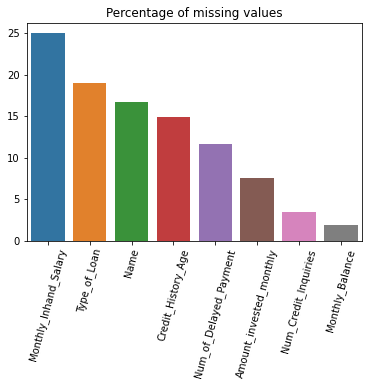

In [125]:
plt.xticks(rotation = '75')
sns.barplot(x = empty_space_df_percentage.index, y = empty_space_df_percentage)
plt.title('Percentage of missing values');

# Test Data Preprocessing

In [126]:
test_df = test_df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

# Remove Unnecessary column

In [127]:
test = test_df.drop(["ID",'SSN','Name','Type_of_Loan'], axis=1)

In [128]:
test.shape

(50000, 23)

In [129]:
test['Customer_ID'] = test.Customer_ID.apply(lambda x: int(x[4:], 16))

In [130]:
test['Age'] = test.Age.astype(int)

In [131]:
test['Annual_Income'] = test.Annual_Income.astype(float)

In [132]:
test['Num_of_Loan'] = test.Num_of_Loan.astype(int)

In [133]:
test['Num_of_Delayed_Payment'] = test.Num_of_Delayed_Payment.astype(float)

In [134]:
test['Changed_Credit_Limit'] = test.Changed_Credit_Limit.astype(float)

In [135]:
test['Outstanding_Debt'] = test.Outstanding_Debt.astype(float)

In [136]:
test['Amount_invested_monthly'] = test.Amount_invested_monthly.astype(float)

In [137]:
test['Monthly_Balance'] = test.Monthly_Balance.astype(float)

In [138]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return num1*12+num2
    else:
        return x

In [139]:
test['Credit_History_Age'] = test.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [140]:
num_cols1 = test.select_dtypes(include=np.number)
cat_cols1 = test.select_dtypes(include='object')

In [141]:
num_cols1

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,3392,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,2022.0,809.98,35.030402,273.0,49.574949,236.642682,186.266702
1,3392,24,19114.12,1824.843333,3,4,3,4,3,9.0,13.27,4.0,809.98,33.053114,274.0,49.574949,21.465380,361.444004
2,3392,24,19114.12,1824.843333,3,4,3,4,-1,4.0,12.27,4.0,809.98,33.811894,NaN,49.574949,148.233938,264.675446
3,3392,24,19114.12,NaN,3,4,3,4,4,5.0,11.27,4.0,809.98,32.430559,276.0,49.574949,39.082511,343.826873
4,8625,28,34847.84,3037.986667,2,4,6,1,3,1.0,5.42,5.0,605.03,25.926822,327.0,18.816215,39.684018,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,34304,4975,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,12.0,3571.70,34.780553,NaN,60.964772,146.486325,275.539570
49996,37932,25,39628.99,NaN,4,6,7,2,20,NaN,11.50,7.0,502.38,27.758522,383.0,35.104023,181.442999,409.394562
49997,37932,25,39628.99,3359.415833,4,6,7,2,23,5.0,13.50,7.0,502.38,36.858542,384.0,35.104023,10000.000000,349.726332
49998,37932,25,39628.99,NaN,4,6,7,2,21,6.0,11.50,7.0,502.38,39.139840,385.0,35.104023,97.598580,463.238981


In [142]:
cat_cols1

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,September,Scientist,Good,No,Low_spent_Small_value_payments
1,October,Scientist,Good,No,High_spent_Medium_value_payments
2,November,Scientist,Good,No,Low_spent_Medium_value_payments
3,December,Scientist,Good,No,High_spent_Medium_value_payments
4,September,NaN,Good,No,High_spent_Large_value_payments
...,...,...,...,...,...
49995,December,Architect,NaN,Yes,Low_spent_Small_value_payments
49996,September,Mechanic,Good,NM,Low_spent_Small_value_payments
49997,October,Mechanic,Good,No,Low_spent_Large_value_payments
49998,November,Mechanic,Good,No,High_spent_Small_value_payments


# Checking Missing Values in columns

In [143]:
def missing_value_columns (data):
    miss_cols = (data.isnull().sum())
    return miss_cols[miss_cols>0]

missing_value_columns(test)

Occupation                 3438
Monthly_Inhand_Salary      7498
Num_of_Delayed_Payment     3498
Changed_Credit_Limit       1059
Num_Credit_Inquiries       1035
Credit_Mix                 9805
Credit_History_Age         4470
Amount_invested_monthly    2271
Payment_Behaviour          3800
Monthly_Balance             562
dtype: int64

In [144]:
miss_cols = (test.isnull().sum())
(miss_cols[miss_cols>0]).index

Index(['Occupation', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Credit_History_Age', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance'],
      dtype='object')

# Otliers Detection & Filling null values

In [145]:
miss_num_cols = list(test[(miss_cols[miss_cols>0]).index].select_dtypes(include=['int64','float64']).columns)
miss_num_cols

['Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

# Boxplot

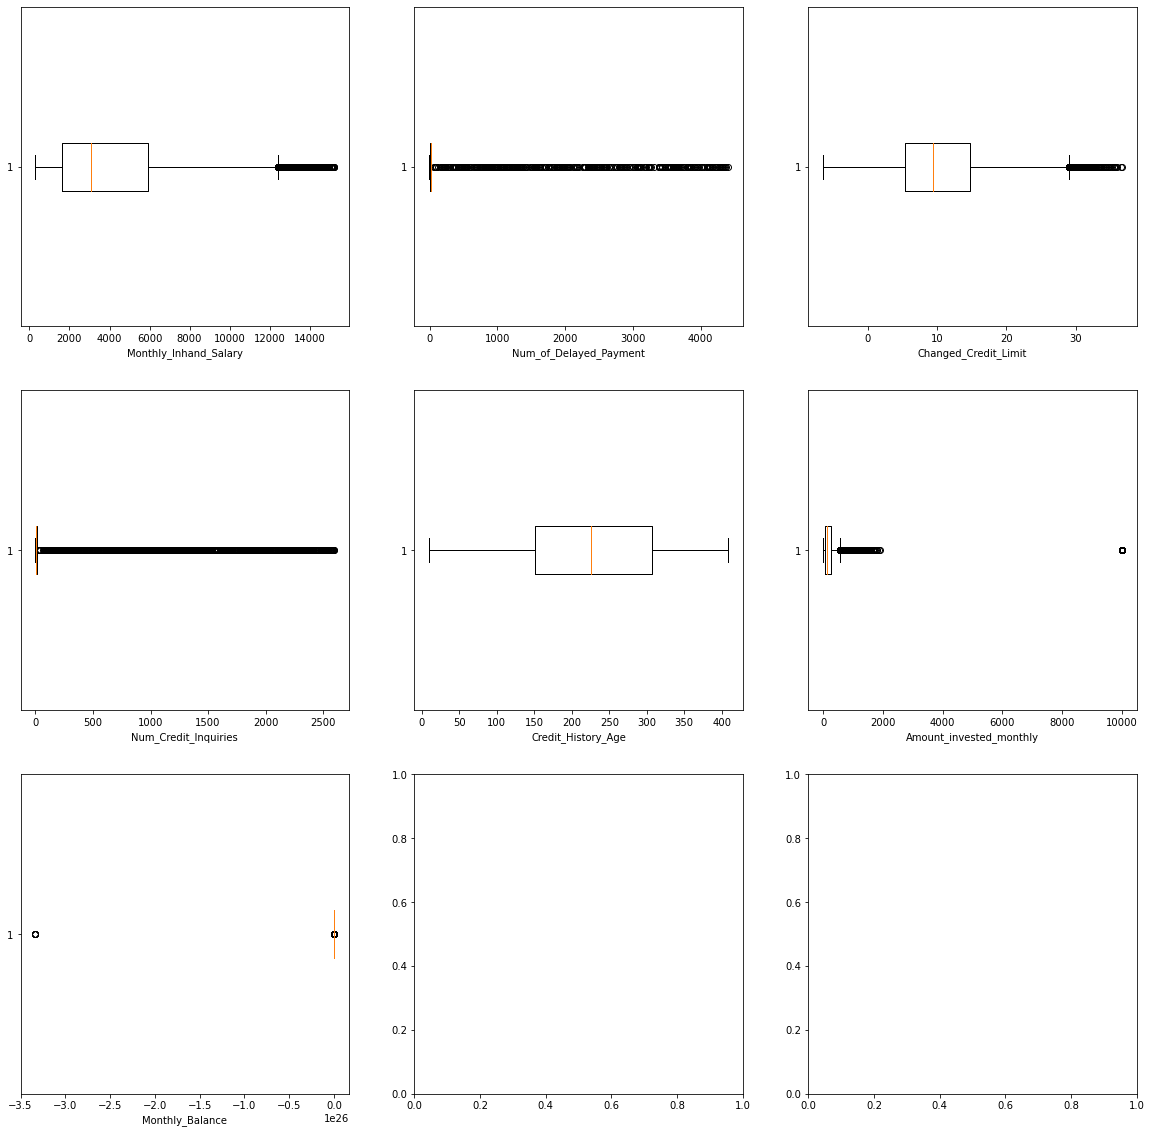

In [146]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i, column in enumerate(miss_num_cols):
    row = i // 3
    col = i % 3
    if row < 5:
        ax = axes[row][col]
        ax.boxplot(test[column].dropna(), vert=False)
        ax.set_xlabel(column)
plt.show()

# Removing Null values from numerical columns

# Monthly_Inhand_Salary

In [147]:
def get_Monthly_Inhand_Salary(row):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        Monthly_Inhand_Salary=(test[test['Customer_ID']==row['Customer_ID']]['Monthly_Inhand_Salary'].dropna()).mode()
        try:
            return Monthly_Inhand_Salary[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Inhand_Salary']

In [148]:
test['Monthly_Inhand_Salary']=test.apply(get_Monthly_Inhand_Salary,axis=1)

In [149]:
#Detect Outliers

print(test[test['Monthly_Inhand_Salary']>= 13500].shape)
test=test[test.Monthly_Inhand_Salary < 13500]

(623, 23)


# Num_of_Delayed_Payment

In [150]:
def get_Num_of_Delayed_Payment(row):
    if pd.isnull(row['Num_of_Delayed_Payment']):
        Num_of_Delayed_Payment=(test[test['Customer_ID']==row['Customer_ID']]['Num_of_Delayed_Payment'].dropna()).mode()
        try:
            return Num_of_Delayed_Payment[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Delayed_Payment']

In [151]:
test['Num_of_Delayed_Payment']=test.apply(get_Num_of_Delayed_Payment,axis=1)

In [152]:
print(test[test['Num_of_Delayed_Payment']>=50].shape)
print(test[test['Num_of_Delayed_Payment'] < 0].shape)
test=test[test['Num_of_Delayed_Payment']< 50]
test=test[test['Num_of_Delayed_Payment'] >= 0]

(388, 23)
(309, 23)


# Changed_Credit_Limit

In [153]:
def get_Changed_Credit_Limit(row):
    if pd.isnull(row['Changed_Credit_Limit']):
        Changed_Credit_Limit=(test[test['Customer_ID']==row['Customer_ID']]['Changed_Credit_Limit'].dropna()).mode()
        try:
            return Changed_Credit_Limit[0]
        except:
            return np.NaN
    else:
        return row['Changed_Credit_Limit']

In [154]:
test['Changed_Credit_Limit']=test.apply(get_Changed_Credit_Limit,axis=1)

In [155]:
print(test[test['Changed_Credit_Limit']>=30].shape)
train=test[test['Changed_Credit_Limit'] < 30]

(114, 23)


# Num_Credit_Inquiries

In [156]:
def get_Num_Credit_Inquiries(row):
    if pd.isnull(row['Num_Credit_Inquiries']):
        Num_Credit_Inquiries=(test[test['Customer_ID']==row['Customer_ID']]['Num_Credit_Inquiries'].dropna()).mode()
        try:
            return Num_Credit_Inquiries[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Inquiries']

In [157]:
test['Num_Credit_Inquiries']=test.apply(get_Num_Credit_Inquiries,axis=1)

In [158]:
print(test[test['Num_Credit_Inquiries']>=18].shape)
train=test[test['Num_Credit_Inquiries']<18]

(832, 23)


# Credit_History_Age

In [159]:
def get_Credit_History_Age(row):
    if pd.isnull(row['Credit_History_Age']):
        Credit_History_Age=(test[test['Customer_ID']==row['Customer_ID']]['Credit_History_Age'].dropna()).mode()
        try:
            return Credit_History_Age[0]
        except:
            return np.NaN
    else:
        return row['Credit_History_Age']

In [160]:
test['Credit_History_Age']=test.apply(get_Credit_History_Age,axis=1)

# Amount_invested_monthly

In [161]:
def get_Amount_invested_monthly(row):
    if pd.isnull(row['Amount_invested_monthly']):
        Amount_invested_monthly=(test[test['Customer_ID']==row['Customer_ID']]['Amount_invested_monthly'].dropna()).mode()
        try:
            return Amount_invested_monthly[0]
        except:
            return np.NaN
    else:
        return row['Amount_invested_monthly']

In [162]:
test['Amount_invested_monthly']=test.apply(get_Amount_invested_monthly,axis=1)

In [163]:
print(test[test['Amount_invested_monthly']>=500].shape)
test=test[test['Amount_invested_monthly']<500]

(5390, 23)


# Monthly_Balance

In [164]:
def get_Monthly_Balance(row):
    if pd.isnull(row['Monthly_Balance']):
        Monthly_Balance=(test[test['Customer_ID']==row['Customer_ID']]['Monthly_Balance'].dropna()).mode()
        try:
            return Monthly_Balance[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Balance']

In [165]:
test['Monthly_Balance']=test.apply(get_Monthly_Balance,axis=1)

In [166]:
print(test[test['Monthly_Balance'] <= 0].shape)
print(test[test['Amount_invested_monthly']>=800].shape)
test = test[test['Monthly_Balance'] > 0]
test = test[test['Monthly_Balance'] <= 800]

(5, 23)
(0, 23)


In [167]:
missing_columns=test.isnull().sum()
miss_num_columns = list(test[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

['Credit_History_Age']

# Outliers Checking

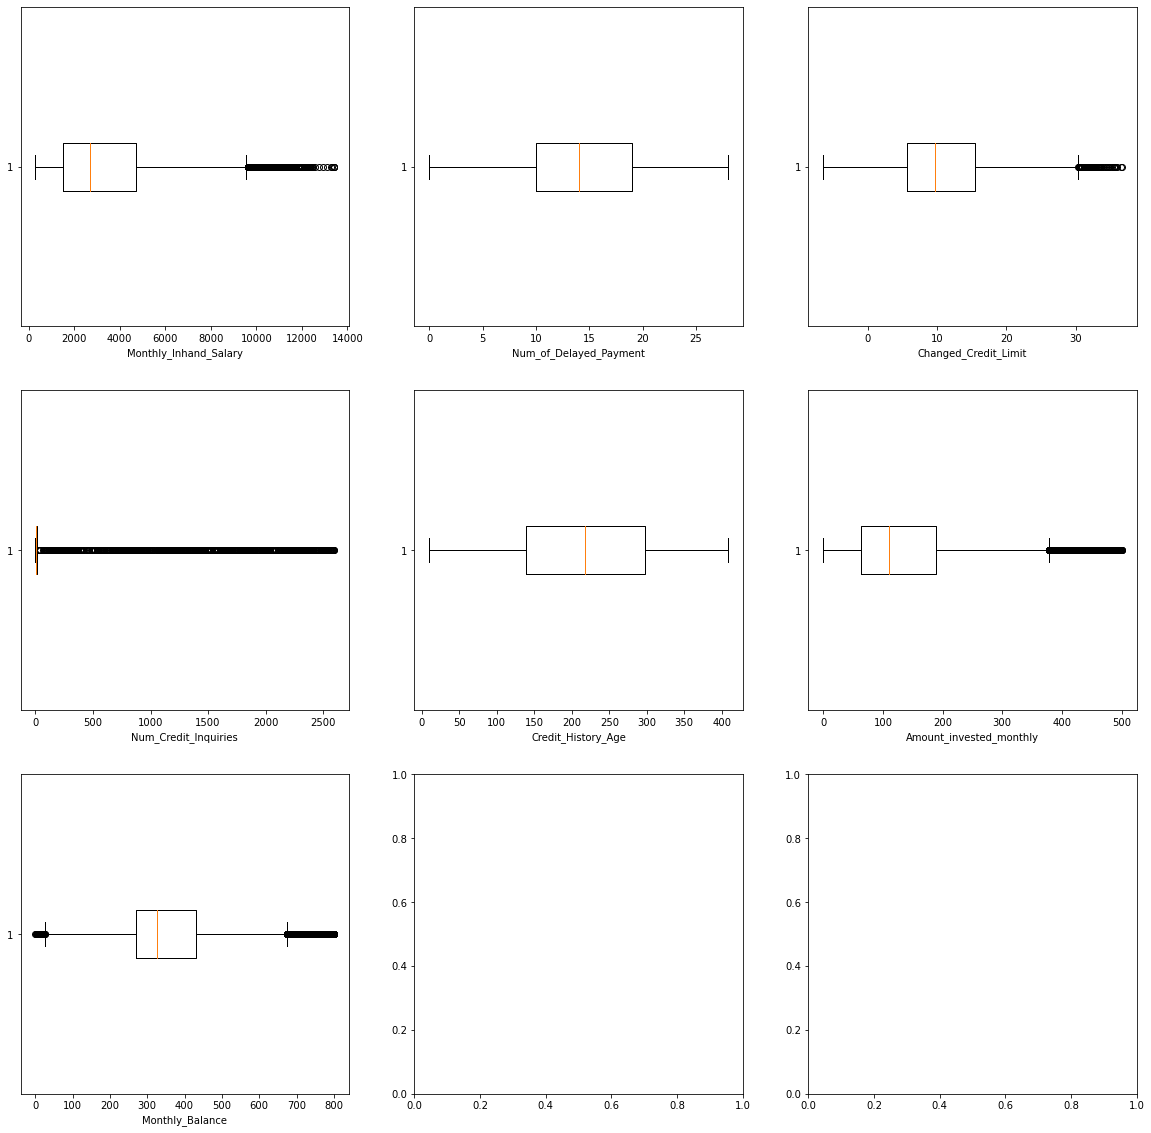

In [168]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i, column in enumerate(miss_num_cols):
    row = i // 3
    col = i % 3
    if row < 5:
        ax = axes[row][col]
        ax.boxplot(test[column].dropna(), vert=False)
        ax.set_xlabel(column)
plt.show()

In [169]:
missing_columns=test.isnull().sum()
miss_cat_columns = list(test[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["object","category"]).columns)
miss_cat_columns

['Occupation', 'Credit_Mix', 'Payment_Behaviour']

# Filling null values in Categorical columns

In [170]:
missing_value_columns(test)

Occupation            2764
Credit_Mix            7965
Credit_History_Age       6
Payment_Behaviour     3080
dtype: int64

# Occupation

In [171]:
def get_Occupation(row):
    if pd.isnull(row['Occupation']):
        Occupation=(test[test['Customer_ID']==row['Customer_ID']]['Occupation'].dropna()).mode()
        try:
            return Occupation[0]
        except:
            return np.NaN
    else:
        return row['Occupation']

In [172]:
test['Occupation']=test.apply(get_Occupation,axis=1)

In [173]:
test['Occupation'] = test['Occupation'].fillna(test['Occupation'].mode()[0])

In [174]:
len(test[test['Occupation'].isnull()])

0

# Credit_Mix

In [175]:
def get_Credit_Mix(row):
    if pd.isnull(row['Credit_Mix']):
        Credit_Mix=(test[test['Customer_ID']==row['Customer_ID']]['Credit_Mix'].dropna()).mode()
        try:
            return Credit_Mix[0]
        except:
            return np.NaN
    else:
        return row['Credit_Mix']

In [176]:
test['Credit_Mix']=test.apply(get_Credit_Mix,axis=1)

In [177]:
test['Credit_Mix'] = test['Credit_Mix'].fillna(test['Credit_Mix'].mode()[0])

In [178]:
len(test[test['Credit_Mix'].isnull()])

0

# Payment_Behaviour

In [179]:
def get_Payment_Behaviour(row):
    if pd.isnull(row['Payment_Behaviour']):
        Payment_Behaviour=(test[test['Customer_ID']==row['Customer_ID']]['Payment_Behaviour'].dropna()).mode()
        try:
            return Payment_Behaviour[0]
        except:
            return np.NaN
    else:
        return row['Payment_Behaviour']

In [180]:
test['Payment_Behaviour']=test.apply(get_Payment_Behaviour,axis=1)

In [181]:
test['Payment_Behaviour'] = test['Payment_Behaviour'].fillna(test['Payment_Behaviour'].mode()[0])

In [182]:
len(test[test['Payment_Behaviour'].isnull()])

0

# Removing outliers by Manual Estimation

In [183]:
test.drop(test[test.Age < 10].index, inplace=True)
test.drop(test[test.Age > 99].index, inplace=True)

In [184]:
#to limit the number of bank account till 15
test.drop(test[test.Num_Bank_Accounts>15].index, inplace = True)

#to remove the entries having number of credit card more than 15 
test.drop(test[test.Num_Credit_Card > 15].index, inplace = True)

#to drop the entries having unrealistic Annual Income, which is greater 1000000.00
test.drop(test[test.Annual_Income > 1000000.00].index, inplace = True)

#to drop the negative number of loan
test.drop(test[test.Num_of_Loan < 0].index, inplace = True)

#to drop the entries having number of loan greater than 20
test.drop(test[test.Num_of_Loan > 20].index, inplace = True)

#to drop the enties having intrest rate greater than 1000.0
test.drop(test[test.Interest_Rate >1000.0].index, inplace = True)

#to drop the negative values of delay from due date
test.drop(test[test.Delay_from_due_date < 0].index, inplace = True)

#to drop the entires having total EMI per month greater than 10000
test.drop(test[test.Total_EMI_per_month > 10000.00].index, inplace = True)

#to drop entries having number of credit inquiry greater than 10
test.drop(test[test.Num_Credit_Inquiries >10].index, inplace=True)

# Encoding categorical features

In [185]:
test['Month'].unique()

array(['October', 'December', 'September', 'November'], dtype=object)

In [186]:
Months = ['October', 'December', 'September', 'November']

In [187]:
# Define a dictionary to map each category to a numerical label
label_map = {}
label = 0
for i in Months:
    label_map[i] = label
    label += 1

# Map the Month column to its encoded labels
test['Month_Encoded'] = test['Month'].apply(lambda x: label_map[x])

In [188]:
test.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_Encoded
1,3392,October,24,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,0
3,3392,December,24,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,1
4,8625,September,28,Teacher,34847.84,3037.986667,2,4,6,1,...,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,2
5,8625,October,28,Teacher,34847.84,3037.986667,2,4,6,1,...,Good,605.03,30.116600,328.0,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,0
6,8625,November,28,Teacher,34847.84,3037.986667,2,4,6,1,...,Good,605.03,30.996424,329.0,No,18.816215,72.680145,High_spent_Large_value_payments,452.302307,3


In [189]:
test['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Architect', 'Writer', 'Mechanic'],
      dtype=object)

In [190]:
Occupations = ['Scientist', 'Teacher', 'Entrepreneur', 'Developer', 'Lawyer',
       'Media_Manager', 'Doctor', 'Journalist', 'Engineer', 'Manager',
       'Accountant', 'Musician', 'Writer', 'Architect', 'Mechanic']

In [191]:
label_map = {}
label = 0
for i in Occupations:
    label_map[i] = label
    label += 1

test['Occupation_Encoded'] = test['Occupation'].apply(lambda x: label_map[x])

In [192]:
test['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [193]:
Credit_Mixs = ['Good', 'Standard', 'Bad']

In [194]:
label_map = {}
label = 0
for i in Credit_Mixs:
    label_map[i] = label
    label += 1

test['Credit_Mix_Encoded'] = test['Credit_Mix'].apply(lambda x: label_map[x])

In [195]:
test['Payment_Behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Small_value_payments'], dtype=object)

In [196]:
Payment_Behaviours = ['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments']

In [197]:
label_map = {}
label = 0
for i in Payment_Behaviours:
    label_map[i] = label
    label += 1

test['Payment_Behaviour_Encoded'] = test['Payment_Behaviour'].apply(lambda x: label_map[x])

In [198]:
test['Payment_of_Min_Amount'].unique()

array(['No', 'Yes', 'NM'], dtype=object)

In [199]:
Payment_of_Min_Amounts = ['No', 'Yes', 'NM']

In [200]:
label_map = {}
label = 0
for i in Payment_of_Min_Amounts:
    label_map[i] = label
    label += 1

test['Payment_of_Min_Amount_Encoded'] = test['Payment_of_Min_Amount'].apply(lambda x: label_map[x])

In [201]:
new_test = test.drop(['Month','Occupation','Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount'], axis=1)

In [202]:
new_test.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Encoded,Occupation_Encoded,Credit_Mix_Encoded,Payment_Behaviour_Encoded,Payment_of_Min_Amount_Encoded
1,3392,24,19114.12,1824.843333,3,4,3,4,3,9.0,...,33.053114,274.0,49.574949,21.465380,361.444004,0,0,0,2,0
3,3392,24,19114.12,1824.843333,3,4,3,4,4,5.0,...,32.430559,276.0,49.574949,39.082511,343.826873,1,0,0,2,0
4,8625,28,34847.84,3037.986667,2,4,6,1,3,1.0,...,25.926822,327.0,18.816215,39.684018,485.298434,2,1,0,3,0
5,8625,28,34847.84,3037.986667,2,4,6,1,3,3.0,...,30.116600,328.0,18.816215,251.627369,303.355083,0,1,0,5,0
6,8625,28,34847.84,3037.986667,2,4,6,1,3,1.0,...,30.996424,329.0,18.816215,72.680145,452.302307,3,1,0,3,0


In [203]:
new_test.shape

(24843, 23)

In [204]:
new_test.isna().sum()

Customer_ID                      0
Age                              0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               4
Total_EMI_per_month              0
Amount_invested_monthly          0
Monthly_Balance                  0
Month_Encoded                    0
Occupation_Encoded               0
Credit_Mix_Encoded               0
Payment_Behaviour_Encoded        0
Payment_of_Min_Amount_Encoded    0
dtype: int64

In [205]:
test_data = new_test.values
test_data.shape

(24843, 23)

In [206]:
new_test.columns

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Month_Encoded', 'Occupation_Encoded',
       'Credit_Mix_Encoded', 'Payment_Behaviour_Encoded',
       'Payment_of_Min_Amount_Encoded'],
      dtype='object')

In [207]:
new_train.shape

(56332, 24)

In [208]:
def minmax_scaler(test_data):
    min_val = np.min(test_data)
    max_val = np.max(test_data)
    test_data = (test_data - min_val) / (max_val - min_val)
    return test_data

In [209]:
y_pred = np.array([tree.predict(x) for x in test_data])

In [210]:
y_pred

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [211]:
predict = pd.DataFrame(y_pred, columns = ['Credit_Score'])

In [212]:
predict.head()

,Credit_Score
0,0
1,0
2,0
3,0
4,0


In [213]:
predict['Credit_Score'].value_counts()

1    14045
0     5784
2     5014
Name: Credit_Score, dtype: int64

In [216]:
14045+5784+5014

24843